In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1:Importing and Merging Data

In [286]:
## suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [287]:
## Importing all datasets
churn_data = pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [288]:
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [289]:
internet_data = pd.read_csv('internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


### Combining all data files into one consolidated dataframe

In [290]:
## Merging on 'customerID'
df_1 = pd.merge(churn_data,customer_data,how ='inner',on='customerID')

In [291]:
## Final dataframe with all predictor variables
telecom = pd.merge(df_1,internet_data,how='inner',on='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [292]:
## checking out the shapes
telecom.shape

(7043, 21)

In [293]:
### checking out the statistical description
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [294]:
## Let's see the type of each columm
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 2: Data Preparation

In [295]:
## Converting some binary variables(Yes/No) to 0/1
## defining the map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})

varlist = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

### Applying the map function
telecom[varlist] = telecom[varlist].apply(binary_map)

In [296]:
telecom[varlist].head(2)

,PhoneService,PaperlessBilling,Churn,Partner,Dependents
0,0,1,0,1,0
1,1,0,0,0,0


### For categorical variables with multiple levels create dummy features (one-hot encoded)

In [297]:
## Creating a dummy variable for some of the categorical variables
dummy1 = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)


## concat the results to the master df
telecom = pd.concat([telecom,dummy1],axis=1)
telecom.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0


In [298]:
##dropping the original variables 
telecom.drop(['Contract','PaymentMethod','gender','InternetService'],axis=1,inplace=True)


# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [299]:
telecom.shape

(7043, 39)

In [300]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [301]:
## Converting the format of TotalCharges
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [302]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [303]:
internet_data['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

### Check for outliers

In [304]:
## checking for outliers in the continuous variables
num_telecom=telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [305]:
## Checking outliers at 25%, 50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


- From the distribution shown above, you can see that there are no outliers from the data. The numbers are gradually increasing.

In [306]:
## Checking the total number of null values
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [307]:
## removing records where it is null
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [308]:
## Checking the percentage of null values after removal
telecom.isnull().sum()/len(telecom)*100

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

### Step  3: Splitting the data

In [309]:
from sklearn.model_selection import train_test_split
## predictor variables
X = telecom.drop(['Churn','customerID'],axis=1)
## output variables
y = telecom.Churn


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Step 4:Feature Scaling

In [310]:
from sklearn.preprocessing import StandardScaler

In [311]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
3946,-0.952316,0,0,-0.202600,-0.767315,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,1
3394,-0.262207,1,0,-0.101327,-0.306559,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1635,-1.195884,1,1,0.177587,-0.908535,0,0,0,1,0,...,1,0,0,1,1,0,0,1,0,1
4088,-1.033505,1,0,0.298782,-0.776092,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1886,1.402172,1,1,-0.139512,0.742090,0,1,1,0,1,...,1,0,0,1,0,1,1,0,1,0


In [312]:
## checking out the Churn Rate
churn = telecom.Churn.sum()/len(telecom)*100
churn

26.578498293515356

- We have 27% churn rate

### Step 5: Looking at the correlations

<Axes: >

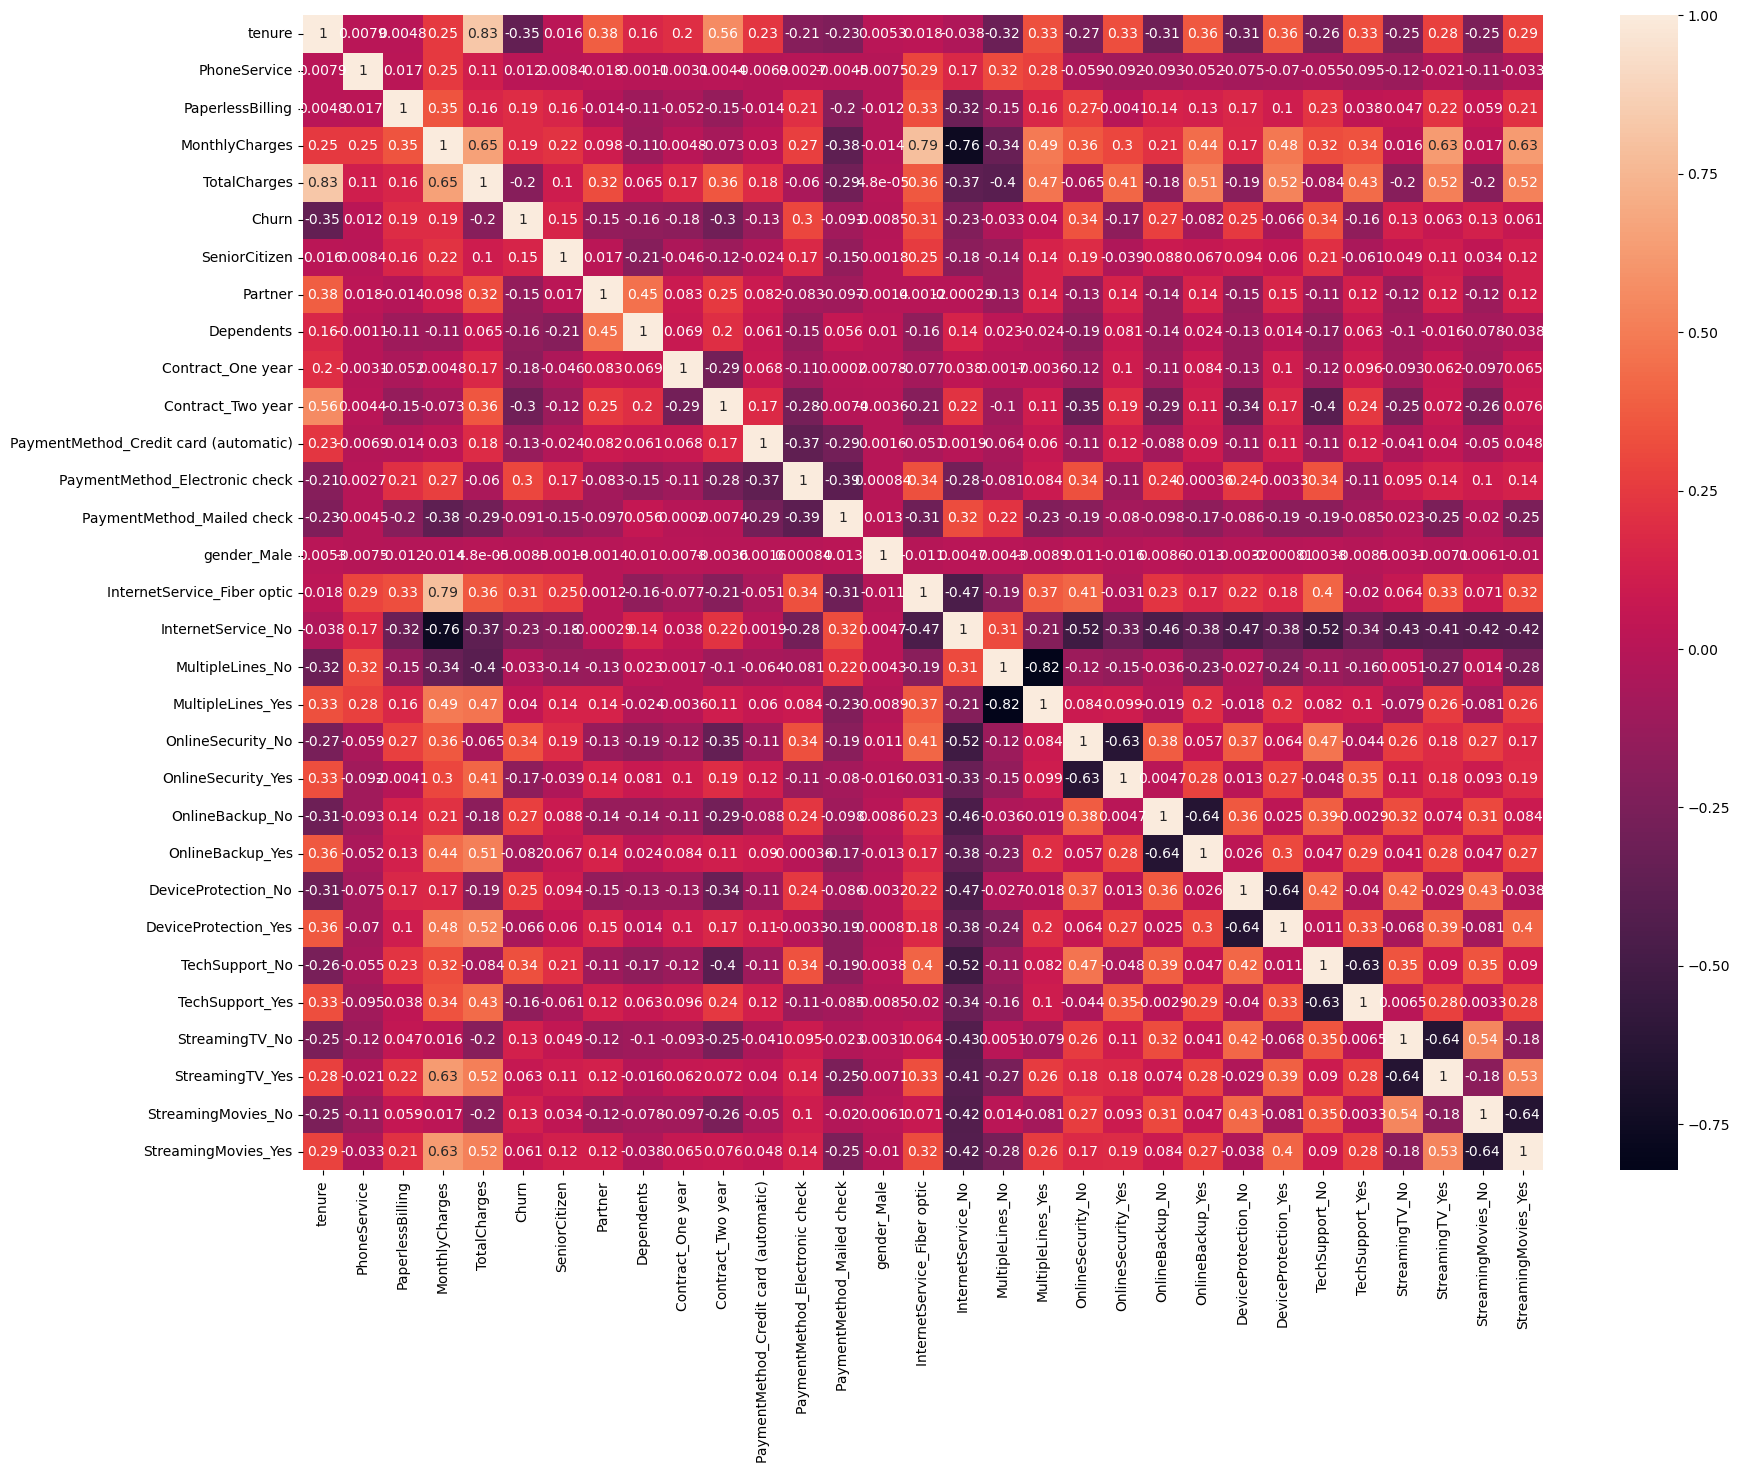

In [313]:
## Checking the correlations
plt.figure(figsize=(20,15))
sns.heatmap(telecom.corr(),annot=True)

### Dropping highly correlated dummy variables

In [314]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

### Step 6: Model Building

### Running the first Model

In [315]:
import statsmodels.api as sm

In [316]:
## Logistic Regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.1
Date:                Wed, 28 Feb 2024   Deviance:                       4042.2
Time:                        23:50:54   Pearson chi2:                 5.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2859
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2320      1.533     -2.108      0.035      -6.237      -0.227
tenure                                   -1.5221      0.187     -8.128      0.000      -1.889      -1.155
PhoneService                              0.5535      0.785      0.705      0.481      -0.984       2.091
PaperlessBilling                          0.2066      0.089      2.327      0.020       0.033       0.381
MonthlyCharges                           -1.6782      1.157     -1.450      0.147      -3.946       0.590
TotalCharges                              0.7688      0.194      3.956      0.000       0.388       1.150
SeniorCitizen                             0.2268      0.101      2.235      0.025       0.028       0.426
Partner                                   0.1332      0.094      1.420      0.155      -0.051       0.317
Dependents                               -0.2451      0.109     -2.240      0.025      -0.460      -0.031
Contract_One year                        -0.8185      0.133     -6.177      0.000      -1.078      -0.559
Contract_Two year                        -1.4284      0.209     -6.823      0.000      -1.839      -1.018
PaymentMethod_Credit card (automatic)    -0.1625      0.137     -1.186      0.236      -0.431       0.106
PaymentMethod_Electronic check            0.2029      0.113      1.790      0.073      -0.019       0.425
PaymentMethod_Mailed check               -0.1224      0.138     -0.886      0.376      -0.393       0.148
gender_Male                              -0.0202      0.078     -0.259      0.796      -0.173       0.133
InternetService_Fiber optic               2.1963      0.965      2.275      0.023       0.304       4.088
InternetService_No                       -2.1515      0.976     -2.204      0.028      -4.065      -0.238
MultipleLines_Yes                         0.4650      0.214      2.173      0.030       0.046       0.884
OnlineSecurity_Yes                       -0.1314      0.215     -0.610      0.542      -0.553       0.291
OnlineBackup_Yes                          0.1700      0.212      0.803      0.422      -0.245       0.585
DeviceProtection_Yes                      0.2282      0.212      1.078      0.281      -0.187       0.643
TechSupport_Yes                          -0.1000      0.218     -0.459      0.647      -0.527       0.327
StreamingTV_Yes                           0.7632      0.393      1.942      0.052      -0.007       1.534
StreamingMovies_Yes                       0.7661      0.396      1.936      0.053      -0.010       1.542
=========================================================================================================
"""

### Step 7 :Recursive Feature Elimination RFE

In [317]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [318]:
rfe.support_

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True])

In [319]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', False, 2),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 4),
 ('Dependents', False, 3),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 5),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 6),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 7),
 ('DeviceProtection_Yes', False, 8),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [320]:
col = X_train.columns[rfe.support_]
col

Index(['tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [321]:
X_train.columns[~rfe.support_]

Index(['PaperlessBilling', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

#### Assessing the model wtih StatsModels

In [322]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.2
Date:                Wed, 28 Feb 2024   Deviance:                       4056.4
Time:                        23:50:55   Pearson chi2:                 5.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2838
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.8268      0.480     -3.804      0.000      -2.768      -0.886
tenure                            -1.4979      0.184     -8.155      0.000      -1.858      -1.138
PhoneService                      -0.1672      0.291     -0.574      0.566      -0.738       0.404
MonthlyCharges                    -0.6283      0.384     -1.635      0.102      -1.382       0.125
TotalCharges                       0.7720      0.193      4.009      0.000       0.395       1.149
SeniorCitizen                      0.2839      0.099      2.858      0.004       0.089       0.479
Contract_One year                 -0.8449      0.132     -6.415      0.000      -1.103      -0.587
Contract_Two year                 -1.4683      0.208     -7.062      0.000      -1.876      -1.061
PaymentMethod_Electronic check     0.3137      0.083      3.796      0.000       0.152       0.476
InternetService_Fiber optic        1.3730      0.334      4.105      0.000       0.717       2.029
InternetService_No                -1.3312      0.379     -3.511      0.000      -2.074      -0.588
MultipleLines_Yes                  0.3079      0.114      2.707      0.007       0.085       0.531
OnlineSecurity_Yes                -0.3116      0.119     -2.618      0.009      -0.545      -0.078
TechSupport_Yes                   -0.2705      0.124     -2.190      0.029      -0.513      -0.028
StreamingTV_Yes                    0.4347      0.161      2.706      0.007       0.120       0.750
StreamingMovies_Yes                0.4352      0.162      2.690      0.007       0.118       0.752
==================================================================================================
"""

- All the p values are significant as per the observation.

In [323]:
## Getting the predicted values on the train set
y_train_pred = logm2.predict(X_train_sm)
y_train_pred

3946    0.359484
3394    0.090383
1635    0.336972
4088    0.681785
1886    0.004135
          ...   
3778    0.418686
5199    0.234953
5235    0.565006
5399    0.008663
862     0.566712
Length: 4922, dtype: float64

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [324]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values,
                                  'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
3946,1,0.359484,3946
3394,0,0.090383,3394
1635,0,0.336972,1635
4088,1,0.681785,4088
1886,0,0.004135,1886


In [325]:
## Creating new column predicted with 1 if Churn_Prob>0.5 else 0
def pred(x):
    if x>0.5:
        return 1
    else:
        return 0

In [326]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.apply(pred)
y_train_pred_final

,Churn,Churn_Prob,CustID,predicted
3946,1,0.359484,3946,0
3394,0,0.090383,3394,0
1635,0,0.336972,1635,0
4088,1,0.681785,4088,1
1886,0,0.004135,1886,0
...,...,...,...,...
3778,0,0.418686,3778,0
5199,0,0.234953,5199,0
5235,0,0.565006,5235,1
5399,0,0.008663,5399,0


In [327]:
## Confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
confusion = confusion_matrix(y_train,y_train_pred_final['predicted'])
print(confusion)

[[3221  393]
 [ 574  734]]


In [328]:
print(accuracy_score(y_train,y_train_pred_final['predicted']))

0.8035351483136937


### Checking VIFs

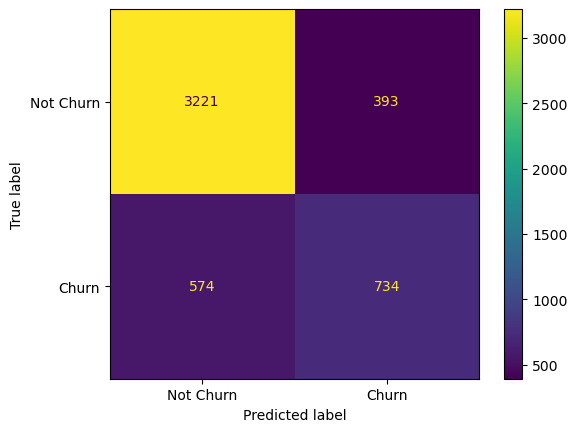

In [329]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion,display_labels=['Not Churn','Churn']).plot()

### Checking VIF's

In [330]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
## Create a dataframe for VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif

,Features,VIF
0,tenure,6.923415
1,PhoneService,8.214364
2,MonthlyCharges,13.169229
3,TotalCharges,10.166253
4,SeniorCitizen,1.308307
5,Contract_One year,2.028858
6,Contract_Two year,3.428678
7,PaymentMethod_Electronic check,1.945698
8,InternetService_Fiber optic,6.373850
9,InternetService_No,6.124823


In [331]:
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
2,MonthlyCharges,13.169229
3,TotalCharges,10.166253
1,PhoneService,8.214364
0,tenure,6.923415
8,InternetService_Fiber optic,6.373850
9,InternetService_No,6.124823
6,Contract_Two year,3.428678
13,StreamingTV_Yes,2.778806
14,StreamingMovies_Yes,2.726695
10,MultipleLines_Yes,2.533935


In [332]:
col = col.drop('MonthlyCharges',1)
col

Index(['tenure', 'PhoneService', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [333]:
## Re running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.5
Date:                Wed, 28 Feb 2024   Deviance:                       4059.0
Time:                        23:50:56   Pearson chi2:                 5.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2834
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0880      0.159     -6.823      0.000      -1.400      -0.775
tenure                            -1.4673      0.182     -8.058      0.000      -1.824      -1.110
PhoneService                      -0.5662      0.159     -3.571      0.000      -0.877      -0.255
TotalCharges                       0.7055      0.188      3.758      0.000       0.338       1.073
SeniorCitizen                      0.2831      0.099      2.851      0.004       0.089       0.478
Contract_One year                 -0.8621      0.131     -6.569      0.000      -1.119      -0.605
Contract_Two year                 -1.4800      0.208     -7.127      0.000      -1.887      -1.073
PaymentMethod_Electronic check     0.3136      0.083      3.795      0.000       0.152       0.476
InternetService_Fiber optic        0.8616      0.117      7.374      0.000       0.633       1.091
InternetService_No                -0.7692      0.161     -4.783      0.000      -1.084      -0.454
MultipleLines_Yes                  0.2057      0.095      2.168      0.030       0.020       0.392
OnlineSecurity_Yes                -0.4138      0.101     -4.080      0.000      -0.613      -0.215
TechSupport_Yes                   -0.3821      0.103     -3.708      0.000      -0.584      -0.180
StreamingTV_Yes                    0.2249      0.096      2.337      0.019       0.036       0.413
StreamingMovies_Yes                0.2235      0.097      2.314      0.021       0.034       0.413
==================================================================================================
"""

In [334]:
y_train_pred = logm3.predict(X_train_sm)
y_train_pred_final['Churn_Prob'] = y_train_pred

In [335]:
## Adding a prediction column
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final

,Churn,Churn_Prob,CustID,predicted
3946,1,0.359081,3946,0
3394,0,0.096019,3394,0
1635,0,0.345169,1635,0
4088,1,0.667238,4088,1
1886,0,0.004219,1886,0
...,...,...,...,...
3778,0,0.410814,3778,0
5199,0,0.248949,5199,0
5235,0,0.561016,5235,1
5399,0,0.008736,5399,0


In [336]:
## Checking out the accuracy
print(accuracy_score(y_train,y_train_pred_final['predicted']))

0.8023161316537992


- The overall accuracy has not dropped much here

### Let's check VIF again

In [337]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,PhoneService,8.188758
2,TotalCharges,7.548999
0,tenure,6.608511
7,InternetService_Fiber optic,3.977013
5,Contract_Two year,3.321564
8,InternetService_No,3.294141
12,StreamingTV_Yes,2.615204
13,StreamingMovies_Yes,2.599567
9,MultipleLines_Yes,2.449551
11,TechSupport_Yes,2.034118


In [338]:
## Dropping PhoneService since it has high VIF
col = col.drop('PhoneService',1)
col

Index(['tenure', 'TotalCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [339]:
## Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2035.9
Date:                Wed, 28 Feb 2024   Deviance:                       4071.7
Time:                        23:50:56   Pearson chi2:                 5.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2816
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4708      0.120    -12.291      0.000      -1.705      -1.236
tenure                            -1.3423      0.179     -7.515      0.000      -1.692      -0.992
TotalCharges                       0.5830      0.185      3.155      0.002       0.221       0.945
SeniorCitizen                      0.3024      0.099      3.049      0.002       0.108       0.497
Contract_One year                 -0.8684      0.131     -6.620      0.000      -1.125      -0.611
Contract_Two year                 -1.4702      0.207     -7.088      0.000      -1.877      -1.064
PaymentMethod_Electronic check     0.3207      0.082      3.888      0.000       0.159       0.482
InternetService_Fiber optic        0.7185      0.108      6.633      0.000       0.506       0.931
InternetService_No                -0.9426      0.152     -6.195      0.000      -1.241      -0.644
MultipleLines_Yes                  0.1540      0.093      1.655      0.098      -0.028       0.336
OnlineSecurity_Yes                -0.4306      0.101     -4.256      0.000      -0.629      -0.232
TechSupport_Yes                   -0.3973      0.103     -3.866      0.000      -0.599      -0.196
StreamingTV_Yes                    0.2484      0.096      2.589      0.010       0.060       0.437
StreamingMovies_Yes                0.2595      0.096      2.703      0.007       0.071       0.448
==================================================================================================
"""

In [340]:
### Let's check the vif once again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,TotalCharges,7.427208
0,tenure,6.528636
4,Contract_Two year,3.180068
6,InternetService_Fiber optic,2.897551
11,StreamingTV_Yes,2.594348
12,StreamingMovies_Yes,2.579039
7,InternetService_No,2.378320
8,MultipleLines_Yes,2.196069
10,TechSupport_Yes,1.911476
5,PaymentMethod_Electronic check,1.853104


In [342]:
### Let's drop TotalCharges and then build the model once more
col = col.drop(['TotalCharges'],1)
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,Contract_Two year,3.056352
5,InternetService_Fiber optic,2.608566
10,StreamingTV_Yes,2.516998
11,StreamingMovies_Yes,2.501743
7,MultipleLines_Yes,2.173407
6,InternetService_No,1.951282
9,TechSupport_Yes,1.892758
0,tenure,1.876736
2,Contract_One year,1.825218
4,PaymentMethod_Electronic check,1.763527


In [343]:
## Let's now build the model once more and check out
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.1
Date:                Wed, 28 Feb 2024   Deviance:                       4082.2
Time:                        23:52:59   Pearson chi2:                 4.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2801
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.5513      0.116    -13.375      0.000      -1.779      -1.324
tenure                            -0.8288      0.065    -12.706      0.000      -0.957      -0.701
SeniorCitizen                      0.2992      0.100      3.004      0.003       0.104       0.494
Contract_One year                 -0.8586      0.130     -6.596      0.000      -1.114      -0.603
Contract_Two year                 -1.4457      0.205     -7.038      0.000      -1.848      -1.043
PaymentMethod_Electronic check     0.3120      0.083      3.775      0.000       0.150       0.474
InternetService_Fiber optic        0.8714      0.097      8.999      0.000       0.682       1.061
InternetService_No                -0.9442      0.151     -6.233      0.000      -1.241      -0.647
MultipleLines_Yes                  0.2056      0.091      2.249      0.025       0.026       0.385
OnlineSecurity_Yes                -0.3967      0.101     -3.935      0.000      -0.594      -0.199
TechSupport_Yes                   -0.3503      0.102     -3.438      0.001      -0.550      -0.151
StreamingTV_Yes                    0.3127      0.094      3.334      0.001       0.129       0.496
StreamingMovies_Yes                0.3287      0.093      3.517      0.000       0.146       0.512
==================================================================================================
"""

- The VIF is in the range and all the coefficients are also significant.

In [344]:
y_train_pred = logm5.predict(X_train_sm)
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted']  = y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
print(accuracy_score(y_train,y_train_pred_final['predicted']))

0.8027224705404307


- It seems like the accuracy is still good and not that much deprecated.

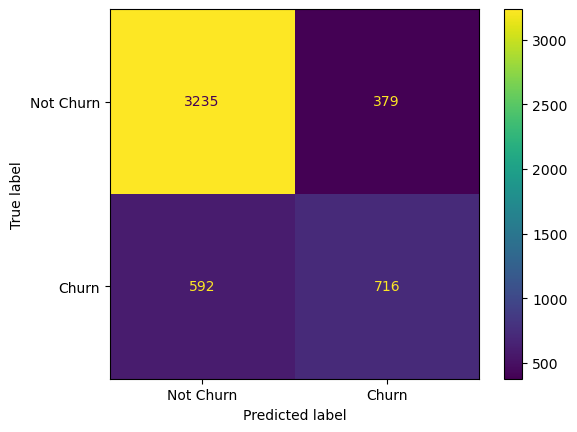

In [355]:
## confusion matrix
confusion = confusion_matrix(y_train,y_train_pred_final['predicted'])
ConfusionMatrixDisplay(confusion,display_labels=['Not Churn','Churn']).plot()

### Metrics beyong simple accuracy

In [375]:
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [377]:
## sensitivity
sensitivity = TP/(TP+FN)
sensitivity*100

54.74006116207951

In [378]:
## Let us calculate specificity
specificity = TN/(TN+FP)
specificity*100

89.51300498063088

In [380]:
## False positive rate when the customer has not churned
(FP)/(TN+FP)*100

10.48699501936912

In [381]:
## False negative rate when the customer has churned
(FN)/(FN+TP)*100

45.25993883792049

In [382]:
## positive predictive value
print(TP/float(TP+FP))

0.6538812785388128


In [383]:
## Negative predictive value
print(TN/(TN+FN))

0.8453096420172459


In [384]:
## DataFrame for the metrics
met = pd.DataFrame()
met['Metrics'] = ['Accuracy','Sensitivity','Specificity']
met['Value'] = [accuracy_score(y_train,y_train_pred_final['predicted']),sensitivity,specificity]

In [385]:
met

,Metrics,Value
0,Accuracy,0.802722
1,Sensitivity,0.547401
2,Specificity,0.895130


- Note: Since the model is having a very low sensitivity we have to deal with it.
- This means the model is actually not predicting custmers as churned when actually they have churned.

In [388]:
y_train_pred_final.to_csv('y_train_final.csv')

### Step 9:Plotting the ROC curve

In [389]:
from sklearn.metrics import roc_auc_score,roc_curve

In [391]:
fpr,tpr,thresholds  = roc_curve(y_train,y_train_pred_final['predicted'])

array([0.        , 0.10486995, 1.        ])

In [393]:
roc_auc_score(y_train,y_train_pred_final['predicted'])

0.7212653307135519

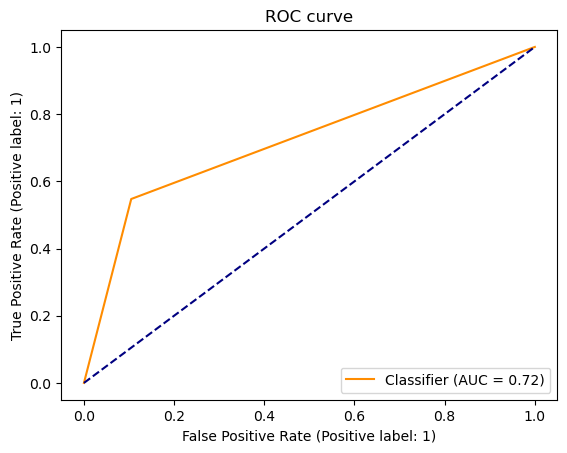

In [428]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_train,y_train_pred_final['predicted'],color="darkorange")
plt.title("ROC curve")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

### Step 10: Finding Optimal Cut off

In [436]:
## Create columns with different thresholds
numbers = [i/10 for i in range(0,11)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
3946,1,0.295746,3946,0,1,1,1,0,0,0,0,0,0,0,0
3394,0,0.111876,3394,0,1,1,0,0,0,0,0,0,0,0,0
1635,0,0.385709,1635,0,1,1,1,1,0,0,0,0,0,0,0
4088,1,0.666909,4088,1,1,1,1,1,1,1,1,0,0,0,0
1886,0,0.007347,1886,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,0.412257,3778,0,1,1,1,1,1,0,0,0,0,0,0
5199,0,0.205280,5199,0,1,1,1,0,0,0,0,0,0,0,0
5235,0,0.557315,5235,1,1,1,1,1,1,1,0,0,0,0,0
5399,0,0.018997,5399,0,1,0,0,0,0,0,0,0,0,0,0


In [438]:
## create a dataframe with cut off value , accuracy, sensitivity and specificity
df = pd.DataFrame(columns=['Cut off','Accuracy','sensitivity','specificity'])
cut_off = [i/10 for i in range(0,11)]
for i in cut_off:
    cuff_off = i
    acc = accuracy_score(y_train_pred_final.Churn,y_train_pred_final[i])
    conf = confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i]) 
    tn = conf[0][0]
    fp = conf[0][1]
    fn = conf[1][0]
    tp = conf[1][1]
    sens = tp/(tp+fn)
    speci = tn/(tn+fp)
    df.loc[len(df)] = [i,acc,sens,speci]
df

,Cut off,Accuracy,sensitivity,specificity
0,0.0,0.265746,1.000000,0.000000
1,0.1,0.617229,0.942661,0.499447
2,0.2,0.718610,0.850153,0.671002
3,0.3,0.764933,0.764526,0.765080
4,0.4,0.791142,0.658257,0.839236
5,0.5,0.802722,0.547401,0.895130
6,0.6,0.795815,0.397554,0.939956
7,0.7,0.771434,0.204128,0.976757
8,0.8,0.742178,0.035168,0.998063
9,0.9,0.734254,0.000000,1.000000


- Therefore as per the sensitivity-specificity view our cut off value should be 0.3 which is optimal.

In [445]:
df['FPR'] = 1-df['specificity']

<Axes: xlabel='Cut off'>

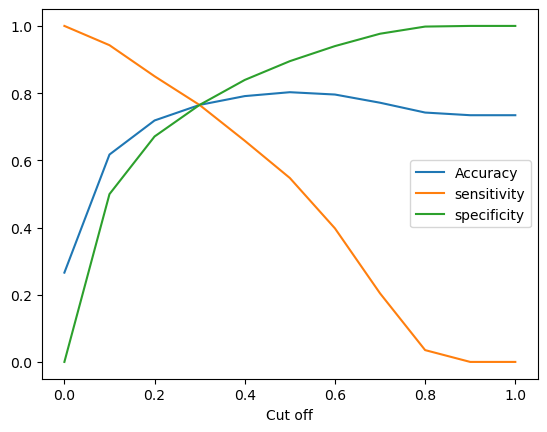

In [447]:
## plotting cut off against the accuracy, sensitivity and specificity
df.plot(x='Cut off',y=['Accuracy','sensitivity','specificity'])

<Axes: xlabel='Cut off'>

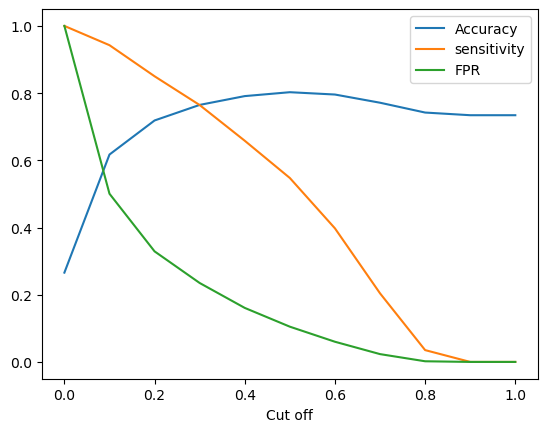

In [446]:
## plotting cut off against the accuracy, sensitivity and FPR
df.plot(x='Cut off',y=['Accuracy','sensitivity','FPR'])

In [450]:
y_train_pred_final.columns

Index([     'Churn', 'Churn_Prob',     'CustID',  'predicted',          0.0,
                0.1,          0.2,          0.3,          0.4,          0.5,
                0.6,          0.7,          0.8,          0.9,          1.0],
      dtype='object')

In [453]:
cut_off = 0.3
conf = confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[cut_off]) 
tn = conf[0][0]
fp = conf[0][1]
fn = conf[1][0]
tp = conf[1][1]
sens = tp/(tp+fn)
speci = tn/(tn+fp)   

In [454]:
conf

array([[2765,  849],
       [ 308, 1000]], dtype=int64)

In [456]:
sens

0.764525993883792

### Precisonand Recall

In [458]:
## for cut off =0.3
## precision
precision = tp/(tp+fp)

## recall
recall = tp/(tp+fn)
print('precision:',precision)
print('recall:',recall)

precision: 0.5408328826392644
recall: 0.764525993883792


### Precision and recall tradeoff

In [485]:
from sklearn.metrics import precision_recall_curve
## for cut off 0.5
p,r,thresholds  = precision_recall_curve(y_train,y_train_pred_final.Churn_Prob)

In [486]:
thresholds

array([0.00510944, 0.00528334, 0.00546313, ..., 0.85438097, 0.85851706,
       0.86255457])

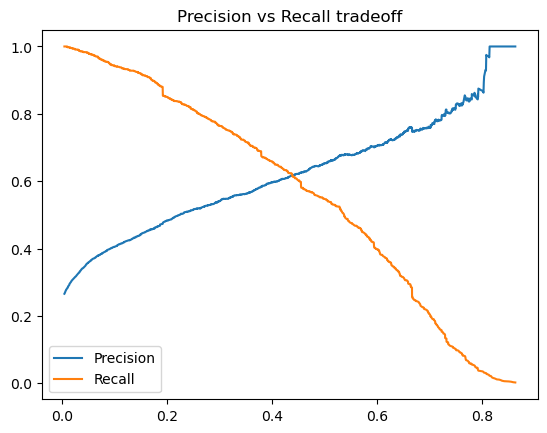

In [481]:
plt.plot(thresholds,p[:-1],label='Precision')
plt.plot(thresholds,r[:-1],label='Recall')
plt.legend()
plt.title('Precision vs Recall tradeoff')
plt.show()

- In case of Precision-Recall view the threshold came to be 0.42

### Step 10:Making predictions on the test set

In [497]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [510]:
col = X_train_sm.columns
col

Index(['const', 'tenure', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [511]:
col = col.drop(['const'],1)
col

Index(['tenure', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [513]:
X_test = X_test[col]
## adding a constant
X_test_sm = sm.add_constant(X_test)
y_test_pred = logm5.predict(X_test_sm)
y_test_pred

2481    0.012168
6784    0.137387
6125    0.694607
3052    0.130651
4099    0.257729
          ...   
2763    0.138751
6747    0.030353
1700    0.011769
1099    0.315997
4720    0.183650
Length: 2110, dtype: float64

In [514]:
## taking the threshold of 0.3
y_test_pred = y_test_pred.map(lambda x:1 if x>0.3 else 0)
y_test_pred

2481    0
6784    0
6125    1
3052    0
4099    0
       ..
2763    0
6747    0
1700    0
1099    1
4720    0
Length: 2110, dtype: int64

In [515]:
## checking the accuracy
acc = accuracy_score(y_test,y_test_pred)
acc

0.7578199052132701

In [516]:
### confusion matrix
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[1171,  378],
       [ 133,  428]], dtype=int64)

In [517]:
TP = conf[1,1]
TN = conf[0,0]
FP = conf[0,1]
FN = conf[1,0]

In [518]:
## sensitivity
sens = tp/(tp+fn)
sens

0.764525993883792

In [519]:
## specificity
spec = tn/(tn+fp)
spec

0.7650802434975097

In [521]:
np.log(0.084/(1-0.084))

-2.3891995658308165